# <center> 👉 class_07_2 IP » _Remapping, Convex/Concave Lens Distortion, Radial Distortion_ </center>  

# Lens Distortion (렌즈 왜곡)

So far, we have learned about image translation, scaling, rotation, affine transformation, and perspective transformation.
All of this can be obtained using the transformation matrix.
However, there are some transformations of shapes that cannot be obtained with a transformation matrix.
Lens distortion transformation is a transformation that cannot be obtained using a transformation matrix.  

Lens distortion conversion types:
- remapping,
- convex/concave lens distortion,
- radial distortion.  

    지금까지 이미지 이동(Translation), 확대/축소(Scaling), 회전(Rotation), 어핀 변환(Affine Transformation), 원근 변환(Perspective Transformation)에 대해 배웠습니다.   
    이는 모두 변환 행렬을 이용해서 구할 수 있습니다.   
    하지만 변환 행렬로는 구할 수 없는 모양의 변환도 있습니다.   
    렌즈 왜곡 변환이 바로 변환 행렬로는 구할 수 없는 변환입니다.   
    렌즈 왜곡 변환에는   
    - 리매핑,     
    - 볼록/오목 렌즈 왜곡,    
    - 방사 왜곡이 있습니다.

## ▶ Remapping 

Remapping is a method of applying geometric transformation to an input image.
- Affine Transform and Perspective Transform, which were covered in geometric transformation, change the image by applying a transformation matrix to the image.
- Remapping can apply a non-linear transformation rather than applying a transformation matrix operation to the image.
- In other words, it means __changing the image by moving the coordinates of pixels to specific, arbitrary coordinates__.  
- Remapping refers to changing the shape of an image at will without any regularity.  

    리매핑(Remapping)은 입력 이미지에 기하학적인 변형을 적용하는 방법입니다.
    - 기하학적 변환에서 다루었던 아핀 변환(Affine Transform)과 원근 변환(Perspective Transform)은 이미지에 변환 행렬을 적용하여, 이미지를 변경합니다.
    - 리매핑은 이미지에 변환 행렬 연산을 적용하는 것이 아닌, 비선형 변환을 적용할 수 있습니다.
    - 즉, 픽셀들의 좌표를 임의의 특정 좌표로 옮겨 이미지를 변경하는 작업을 의미합니다.  
    - 리매핑이란 규칙성 없이 마음대로 이미지의 모양을 변환하는 것을 말합니다.   

OpenCV provides **cv2.remap()**function
    
- **dst = cv2.remap(src, mapx, mapy, interpolation, dst, borderMode, borderValue)**  
    - src: input img
    - mapx, mapy: Coordinates to move to x and y axes, same size as src, x축과 y축으로 이동할 좌표, src와 동일한 크기, dtype=float32
    - dst(optional): result img

👉 - mapx, mapy:
    
For example, if you specify mapx[0][0]=10, mapy[0][0]=5, this means move the pixel at src coordinate (0, 0) to (10, 5). .
It is recommended that mapx and mapy have the coordinates of the original image as their initial values, rather than meaningless values such as 0.
This is because it is convenient to specify new coordinates only for the pixel you want to move out of all pixels or to command it to move by a certain amount from its original position.
You can initialize mapx and mapy with np.zeros() and then with a for loop, but this takes too long.  

> 예를 들어, mapx[0][0]=10, mapy[0][0]=5로 지정했다면 이 의미는 src 좌표 (0, 0)에 있는 픽셀을 (10, 5)로 옮기라는 것입니다.     
> mapx와 mapy는 초기 값으로 0 같은 의미 없는 값이 아니라 원래 이미지의 좌표 값을 갖는 것이 좋습니다.   
> 왜냐하면 전체 픽셀 중 옮기고 싶은 픽셀에 대해서만 새로운 좌표를 지정하거나 원래 위치에서 얼마만큼 이동하라고 명령하는 것이 편하기 때문입니다.   
> mapx와 mapy를 np.zeros()로 초기화한 뒤 for문으로 초기화할 수 있지만 이렇게 하면 시간이 너무 오래 걸립니다.   

Instead, you can initialize quickly by using the np.indices() function as follows:
- mapy, mapx = np.indices( (rows, cols), dtype=np.float32)
Below is an example of the np.indices() function.   
The 0th of the returned results is the row array, and the 1st is the col array.  

대신 다음과 같이 np.indices() 함수를 쓰면 빠르게 초기화할 수 있습니다.  
- mapy, mapx = np.indices( (rows, cols), dtype=np.float32)  
아래는 np.indices() 함수의 예시입니다.   
반환된 결과의 0번째가 row 배열, 1번째가 col 배열입니다.   

        np.indices((2,2))  
        array([[[0, 0], [1, 1]], # row  
                [[0, 1], [0, 1]]]) # col  
        np.indices((3, 3))  
        array([[[0, 0, 0], [1, 1, 1], [2, 2, 2]], # row  
                 [[0, 1, 2], [0, 1, 2], [0, 1, 2]]]) # col  

### ■ Flip image with transformation matrix and remapping  

- Calculation formula for flipping an image 영상을 뒤집기 위한 연산식:  

        x' = cols - x - 1
        y' = rows - y - 1  
        
- Transformation matrix and cv2.remap() function produce the same result 변환 행렬과 cv2.remap() 함수는 똑같은 결과  
- Converting with the cv2.remap() function is slower than converting to a transformation matrix  
- Therefore, it is recommended to convert anything that can be expressed as a cv2.warpAffine transformation matrix into a transformation matrix.  
- It is recommended to use the cv2.remap() function only for non-linear transformations that cannot be expressed as a transformation matrix.

In [1]:
# Flip image with transformation matrix and remapping (remap_flip.py)

import cv2
import numpy as np
import time
from matplotlib import pyplot as plt

img = cv2.imread('./images/practice_img/motorcycle.jpg')
rows, cols = img.shape[:2]

st = time.time()
mflip = np.float32([ [-1, 0, cols-1],[0, -1, rows-1]]) # transformation matrix
fliped1 = cv2.warpAffine(img, mflip, (cols, rows))     
print('warpAffine time:', time.time()-st)

st2 = time.time()
mapy, mapx = np.indices((rows, cols),dtype=np.float32) # remapping array
mapx = cols - mapx -1                                  # x-axis coordinate flip operation x축 좌표 뒤집기 연산
mapy = rows - mapy -1                                  # y-axis coordinate flip operation y축 좌표 뒤집기 연산
fliped2 = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)  # remapping
print('remap time:', time.time()-st2)

cv2.imshow('origin', img)
cv2.imshow('warpAffine',fliped1)
cv2.imshow('remap',fliped2)
cv2.waitKey()
cv2.destroyAllWindows()

warpAffine: 0.004987001419067383
remap: 0.006983518600463867


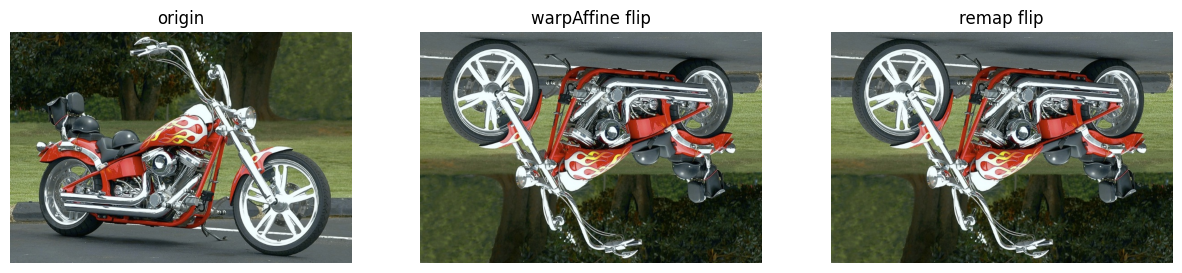

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

plt.subplot(131),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('origin'),plt.axis('off')
plt.subplot(132),plt.imshow(cv2.cvtColor(fliped1, cv2.COLOR_BGR2RGB)),plt.title('warpAffine flip'),plt.axis('off')
plt.subplot(133),plt.imshow(cv2.cvtColor(fliped2, cv2.COLOR_BGR2RGB)),plt.title('remap flip'),plt.axis('off')
plt.show()

## ▶ Nonlinear remapping using trigonometric functions 삼각함수를 이용한 비선형 리매핑  

Nonlinear transformation that cannot be expressed as a transformation matrix: using trigonometric functions and the cv2.remap() function  
Outer correction with cv2.BORDER_REPLICATE parameter  

    변환 행렬로 표현할 수 없는 비선형 변환 : 삼각함수와 cv2.remap() 함수 이용  
    cv2.BORDER_REPLICATE 파라미터로 외곽 보정

In [15]:
# remap_sin_cos.py

import cv2
import numpy as np

l = 20      # wave length 파장
amp = 15    # amplitude  진폭

img = cv2.imread('./images/practice_img/motorcycle.jpg')
rows, cols = img.shape[:2]

mapy, mapx = np.indices((rows, cols),dtype=np.float32)

sinx = mapx + amp * np.sin(mapy/l)  
cosy = mapy + amp * np.cos(mapx/l)

img_sinx=cv2.remap(img, sinx, mapy, cv2.INTER_LINEAR) # Apply sin curve only to x-axis x축만 sin 곡선 적용
img_cosy=cv2.remap(img, mapx, cosy, cv2.INTER_LINEAR) # Apply cos curve only to y axis y축만 cos 곡선 적용
img_both=cv2.remap(img, sinx, cosy, cv2.INTER_LINEAR, None, cv2.BORDER_REPLICATE) # Apply sin and cos curves to both x and y axes and compensate for outlying areas x,y 축 모두 sin, cos 곡선 적용 및 외곽 영역 보정

cv2.imshow('origin', img)
cv2.imshow('sin x', img_sinx)
cv2.imshow('cos y', img_cosy)
cv2.imshow('sin & cos', img_both)

cv2.waitKey()
cv2.destroyAllWindows()

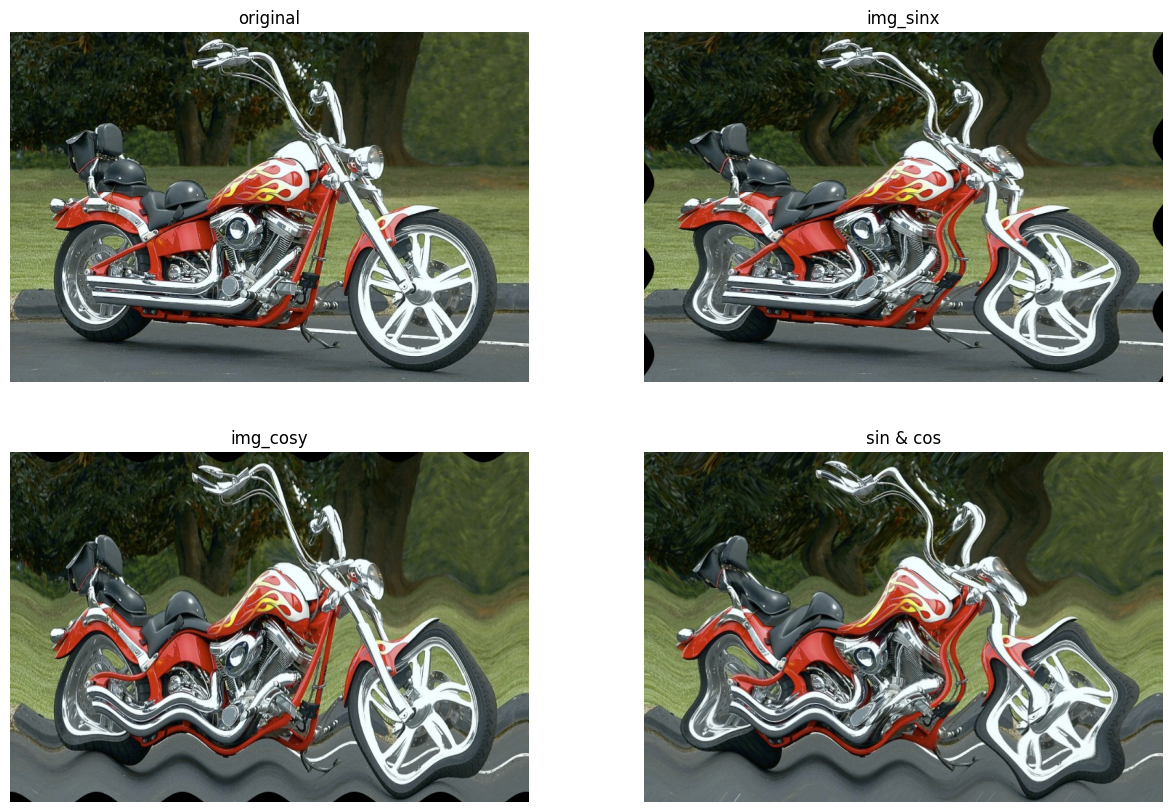

In [16]:
import matplotlib.pylab as plt

fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0, 0].axis('off'), axs[0, 0].set_title('original')
axs[0, 1].imshow(cv2.cvtColor(img_sinx, cv2.COLOR_BGR2RGB)), axs[0, 1].axis('off'), axs[0, 1].set_title('img_sinx')
axs[1, 0].imshow(cv2.cvtColor(img_cosy, cv2.COLOR_BGR2RGB)), axs[1, 0].axis('off'), axs[1, 0].set_title('img_cosy')
axs[1, 1].imshow(cv2.cvtColor(img_both, cv2.COLOR_BGR2RGB)), axs[1, 1].axis('off'), axs[1, 1].set_title('sin & cos')

plt.show()

Both sin and cos functions were applied to the last image, and you can see that the missing area on the outside has been corrected by using the cv2.BORDER_REPLICATE parameter to correct the outline.  
마지막 이미지에는 sin, cos 함수를 모두 적용하였는데, cv2.BORDER_REPLICATE 파라미터로 외곽 보정까지 해주어 외곽의 사라진 영역이 보정된 것을 볼 수 있습니다.

## ▶ Distortion Effect

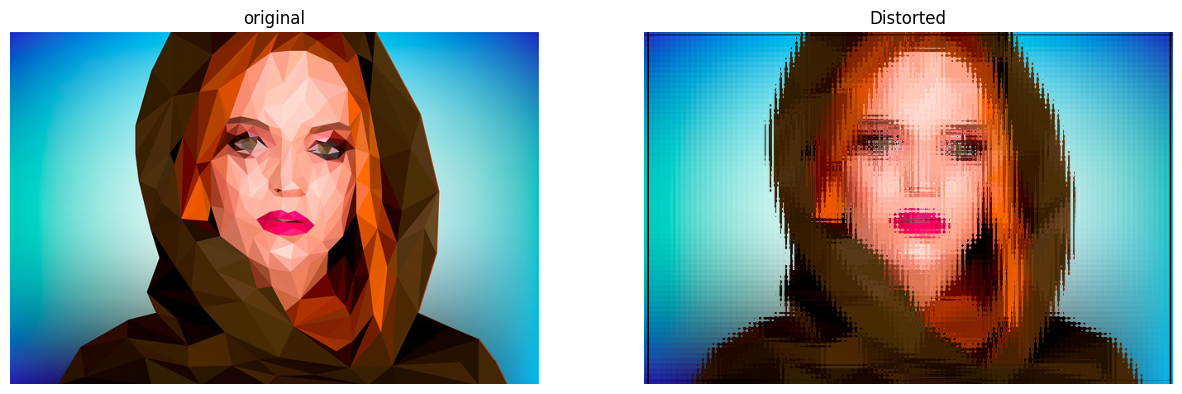

In [19]:
# Example 
import cv2
import numpy as np

src = cv2.imread("./images/practice_img/triangle_face.jpg")
height, width = src.shape[:2]
map2, map1 = np.indices((height, width), dtype=np.float32)

map1 = map1 + width / 100 * np.sin(map1)
map2 = map2 + height / 100 * np.cos(map2)

dst = cv2.remap(src, map1, map2, cv2.INTER_CUBIC)
cv2.imshow("org", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

plt.subplot(121),plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)),plt.title('original'),plt.axis('off')
plt.subplot(122),plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)),plt.title('Distorted'),plt.axis('off')
plt.show()

### ■ wave distortion

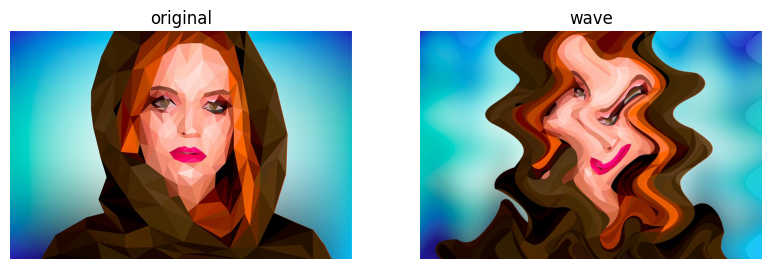

In [6]:
# wave distortion
import cv2
import numpy as np

src = cv2.imread("./images/practice_img/triangle_face.jpg")
height, width = src.shape[:2]
map_y, map_x = np.indices((height, width), dtype=np.float32)

map_wave_x, map_wave_y = map_x.copy(), map_y.copy()
map_wave_x = map_wave_x + 30*np.sin(map_y/20)
map_wave_y = map_wave_y + 30*np.sin(map_x/20)    
wave = cv2.remap(src,map_wave_x,map_wave_y,cv2.INTER_LINEAR, None, cv2.BORDER_REPLICATE)

cv2.imshow('wave', wave)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

plt.subplot(131),plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)),plt.title('original'),plt.axis('off')
plt.subplot(132),plt.imshow(cv2.cvtColor(wave, cv2.COLOR_BGR2RGB)),plt.title('wave'),plt.axis('off')
plt.show()

## ▶ Convex/Concave Lens Distortion 볼록/오목 렌즈 왜곡  

Cartesian coordinate system / Polar coordinate system 직교 좌표계 / 극좌표계   

<img src='./images/practice_img/lens1.png' width=200 height=200>

<center>극좌표계(Polar coordinate system) https://suhak.tistory.com/161  </center>

* In general, lines are drawn at right angles to the x-axis and y-axis, and the point at which they meet is expressed as coordinates (x, y).  
>- This type of coordinate system is called a __Cartesian coordinate system.__
* On the other hand, there is a method of expressing ($r, \theta$) using the distance from the origin (r) and the included angle ($\theta$), which is called a __polar coordinate system.__

The two coordinate systems are interchangeable.
- Coordinate conversion can be done using an equation, but OpenCV provides the following functions for coordinate conversion.
>- r, theta = cv2.cartToPolar(x, y): Cartesian coordinate → polar coordinate conversion
>- x, y = cv2.polarToCart(r, theta): Polar coordinate → Cartesian coordinate conversion
- Not only the transformation of coordinates, but also the transformation of the reference point of the coordinates is important.
>- Generally, when using a Cartesian coordinate system, the upper left corner of image is set as the origin (0, 0).
>- However, in polar coordinates, __the center of the image must be the origin.__ To place the center of the image at (0, 0), the coordinate values __must be normalized to -1 to 1.__
    
일반적으로 x축과 y축의 직각으로 각각 선을 그어서 만나는 지점을 좌표 (x, y)로 나타냅니다.   
- 이러한 형태의 좌표 시스템을 직교 좌표계(Cartesian coordinate system)라고 부릅니다.   
- 반면, 원점으로부터의 거리($r$)와 사잇각($\theta$)을 이용해서 ($r, \theta$)로 나타내는 방법이 있는데, 이를 극좌표계(Polar coordinate system)라고 부릅니다.   
두 좌표계는 상호 변환이 가능합니다.   
- 좌표 변환은 연산식을 이용해도 되지만, OpenCV는 좌표 변환을 위해 다음과 같은 함수를 제공합니다.  
>- r, theta = cv2.cartToPolar(x, y): 직교 좌표 → 극좌표 변환  
>- x, y = cv2.polarToCart(r, theta): 극좌표 → 직교 좌표 변환  
- 좌표의 변환뿐만 아니라 좌표의 기준점 변환도 중요합니다.   
>- 일반적으로 직교 좌표계를 사용할 때는 좌측 상단을 원점(0, 0)으로 정합니다.   
>- 그러나 극좌표에서는 이미지의 중앙을 원점으로 해야 합니다. 이미지의 중앙을 (0, 0)으로 두기 위해서 좌표의 값을 -1 ~ 1로 정규화해야 합니다.

~ In the below example : 

* **exp** is a variable representing the distortion index of the image.
>- If it is 1, it is the same as the original,
>- If it is __less than 1, it creates a concave lens effect,__
>- If it is __greater than 1, it creates a convex lens effect.__ 
        exp는 이미지의 왜곡 지수를 나타내는 변수로 
        - 1이면 원본과 동일하게 하고, 
        - 1보다 작으면 오목 렌즈 효과를 내고, 
        - 1보다 크면 볼록 렌즈 효과를 냅니다. 
    
* **scale** represents the __size of the circle-shaped area__ in the image where you want to apply the lens effect as a ratio.
>- scale=1 means 100%.
        * scale은 이미지에서 렌즈 효과를 주고 싶은 원 모양 영역의 크기를 비율로 나타낸 것입니다.   
        - scale=1은 100%를 의미합니다.

* mapx = 2*mapx/(cols-1)-1
* mapy = 2*mapy/(rows-1)-1

>- It has the function of changing the reference point of coordinates and normalizing them to the range of -1 to 1.
>- This will later change back to the upper left reference point.  
        좌표의 기준점을 바꾸고 -1~1 범위로 정규화하는 기능을 합니다.   
        이는 이후에 다시 좌상단 기준점으로 변경됩니다.

* r[r< scale] = r[r<scale] **exp   
- Run Lens Effects  
- Coordinates whose radius is smaller than the scale were multiplied by exp (distortion index).
- At this time, if the distortion index is greater than 1, it gives a convex lens effect,   
- and if it is less than 1, it gives a concave lens effect.  
    - 렌즈 효과 실행 
    - 반지름이 scale보다 작은 범위에 있는 좌표에 대해서는 exp(왜곡 지수)를 곱해주었습니다.   
    - 이때 왜곡 지수가 1보다 크면 볼록 렌즈 효과를, 1보다 작으면 오목 렌즈 효과를 줍니다.


In [2]:
# Convex/concave lens distortion effect 볼록/오몬 렌즈 왜곡 효과 (remap_lens.py)

import cv2
import numpy as np

img = cv2.imread('./images/practice_img/motorcycle.jpg')
print(img.shape)
rows, cols = img.shape[:2]
exp = 2       # Convex, concave indices 볼록, 오목 지수 (Convex : 1.1 ~ , Concave : 0.1 ~ 1.)
scale = 1     # size of the circle-shaped area (0 ~ 1)
mapy, mapx = np.indices((rows, cols),dtype=np.float32) # mapping array
print(mapy, mapx)
mapx = 2*mapx/(cols-1)-1   # changing the reference point(normalizing them to the range of -1 to 1)
mapy = 2*mapy/(rows-1)-1
r_cv, theta = cv2.cartToPolar(mapx, mapy) # Convert Cartesian to polar coordinates 
r_cc, theta = cv2.cartToPolar(mapx, mapy) # Convert Cartesian to polar coordinates 

r_cv[r_cv< scale] = r_cv[r_cv<scale] **exp  # exp=2 
r_cc[r_cc< scale] = r_cc[r_cc<scale] **0.5  # exp=0.5

mapx_cv, mapy_cv = cv2.polarToCart(r_cv, theta) 
mapx_cc, mapy_cc = cv2.polarToCart(r_cc, theta) 

mapx_cv = ((mapx_cv + 1)*cols-1)/2    # changing the reference point(upper left corner of image is set as the origin (0, 0))
mapy_cv = ((mapy_cv + 1)*rows-1)/2
mapx_cc = ((mapx_cc + 1)*cols-1)/2    # changing the reference point(upper left corner of image is set as the origin (0, 0))
mapy_cc = ((mapy_cc + 1)*rows-1)/2
distorted_cv = cv2.remap(img,mapx_cv,mapy_cv,cv2.INTER_LINEAR) # remapping
distorted_cc = cv2.remap(img,mapx_cc,mapy_cc,cv2.INTER_LINEAR) # remapping

cv2.imshow('origin', img)
cv2.imshow('remap_lens exp = 2 convex', distorted_cv)
cv2.imshow('remap_lens exp = 0.5 concave', distorted_cc)
cv2.waitKey()
cv2.destroyAllWindows()

(512, 758, 3)
[[  0.   0.   0. ...   0.   0.   0.]
 [  1.   1.   1. ...   1.   1.   1.]
 [  2.   2.   2. ...   2.   2.   2.]
 ...
 [509. 509. 509. ... 509. 509. 509.]
 [510. 510. 510. ... 510. 510. 510.]
 [511. 511. 511. ... 511. 511. 511.]] [[  0.   1.   2. ... 755. 756. 757.]
 [  0.   1.   2. ... 755. 756. 757.]
 [  0.   1.   2. ... 755. 756. 757.]
 ...
 [  0.   1.   2. ... 755. 756. 757.]
 [  0.   1.   2. ... 755. 756. 757.]
 [  0.   1.   2. ... 755. 756. 757.]]


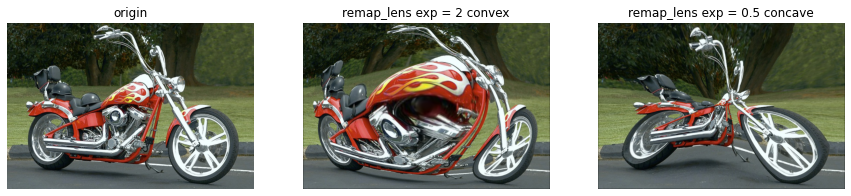

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(15,10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('origin')
axs[1].imshow(cv2.cvtColor(distorted_cv, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('remap_lens exp = 2 convex')
axs[2].imshow(cv2.cvtColor(distorted_cc, cv2.COLOR_BGR2RGB)), axs[2].axis('off'), axs[2].set_title('remap_lens exp = 0.5 concave')

plt.show()

## ▶ Radial Distortion 방사 왜곡  

- Barrel Distortiaon (Positive Radial Distortion )  
>- When taking images with a camera, a phenomenon in which __slight distortion occurs at the edges of the camera is called barrel distortion.__
        카메라를 통해 이미지를 촬영할 때 카메라 가장자리 부분에서 약간 둥그스름해지는 왜곡이 생기는 현상을 배럴 왜곡(Barrel Distortiaon)이라고 합니다.
<img src ='./images/practice_img/distort1.png' width=400 height=400>  
<center>Barrel Distortiaon (http://truemind1.blogspot.com/2016/10/06-2-vr-distortion.html)</center>          


- Pincushion Distortion (Negative Radial Distortion)  
>- Distortion in which __the edges turn inward is called pincushion distortion.__
        가장자리 부분이 안쪽으로 들어가는 형태의 왜곡을 핀쿠션 왜곡(Pincushion Distortion)이라고 함
<img src ='./images/practice_img/distort2.png' width=400 height=400>  
<center>http://egloos.zum.com/eggry/v/4122911</center>

### ▶ Barrel / Pincushion Distortion  

* __ru = r*(1+k1*(r**2) + k2*(r**4) + k3*(r**6))__

The above calculation formula applies barrel distortion and pincushion distortion.
Depending on the values of k1, k2, and k3, it can be either barrel distortion or pincushion distortion.  

        위 연산식은 배럴 왜곡, 핀쿠션 왜곡을 적용해주는 연산식입니다.   
        k1, k2, k3 값에 따라 배럴 왜곡이 될 수도 있고 핀쿠션 왜곡이 될 수도 있습니다. 

- k1, k2, k3 = 0.5, 0.2, 0.0 : Barrel distortion  
- k1, k2, k3 = -0.3, 0, 0    : Pincushion distortion

In [10]:
# reamp_barrel.py
import cv2
import numpy as np

k1_b, k2_b, k3_b = 0.5, 0.2, 0.0 # Barrel
k1_p, k2_p, k3_p = -0.3, 0, 0    # Pincushion

img = cv2.imread('./images/practice_img/motorcycle.jpg')
rows, cols = img.shape[:2]
mapy, mapx = np.indices((rows, cols),dtype=np.float32) 

mapx = 2*mapx/(cols-1)-1
mapy = 2*mapy/(rows-1)-1
r_br, theta = cv2.cartToPolar(mapx, mapy)
r_pn, theta = cv2.cartToPolar(mapx, mapy)
r_br = r_br*(1+k1_b*(r_br**2) + k2_b*(r_br**4) + k3_b*(r_br**6)) 
r_pn = r_pn*(1+k1_p*(r_pn**2) + k2_p*(r_pn**4) + k3_p*(r_pn**6)) 

mapxb, mapyb = cv2.polarToCart(r_br, theta)
mapxp, mapyp = cv2.polarToCart(r_pn, theta)
mapxb = ((mapxb + 1)*cols-1)/2
mapyb = ((mapyb + 1)*rows-1)/2
mapxp = ((mapxp + 1)*cols-1)/2
mapyp = ((mapyp + 1)*rows-1)/2
br_distored = cv2.remap(img,mapxb,mapyb,cv2.INTER_LINEAR) 
pn_distored = cv2.remap(img,mapxp,mapyp,cv2.INTER_LINEAR) 

cv2.imshow('original', img)
cv2.imshow('Barrel distorted', br_distored)
cv2.imshow('Pincushion distorted', pn_distored)
cv2.imwrite("./results/Barrel_distored.jpg", br_distored)
cv2.waitKey()
cv2.destroyAllWindows()

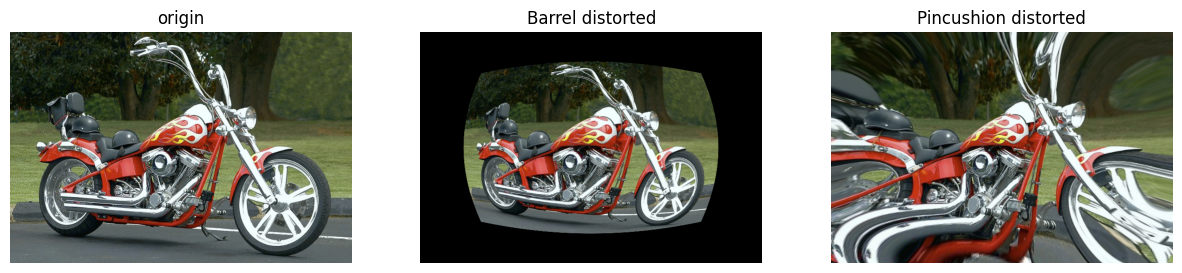

In [11]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

plt.subplot(131),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('origin'),plt.axis('off')
plt.subplot(132),plt.imshow(cv2.cvtColor(br_distored, cv2.COLOR_BGR2RGB)),plt.title('Barrel distorted'),plt.axis('off')
plt.subplot(133),plt.imshow(cv2.cvtColor(pn_distored, cv2.COLOR_BGR2RGB)),plt.title('Pincushion distorted'),plt.axis('off')
plt.show()

In [ ]:
## ▶ Fisheye Lenz Undistortion  

- Lens with FOV (Field of View) of 170 degrees or more : Fisheye lens 
- Data with a wide angle of view can be obtained, but significant distortion (barrel distortion) occurs.    

        FOV (Field of View)가 170도 이상인 렌즈 : 어안렌즈 (Fisheye lens)  
        넓은 화각의 데이터를 얻을 수 있지만, 상당한 왜곡 ((barrel distortion)을 발생    

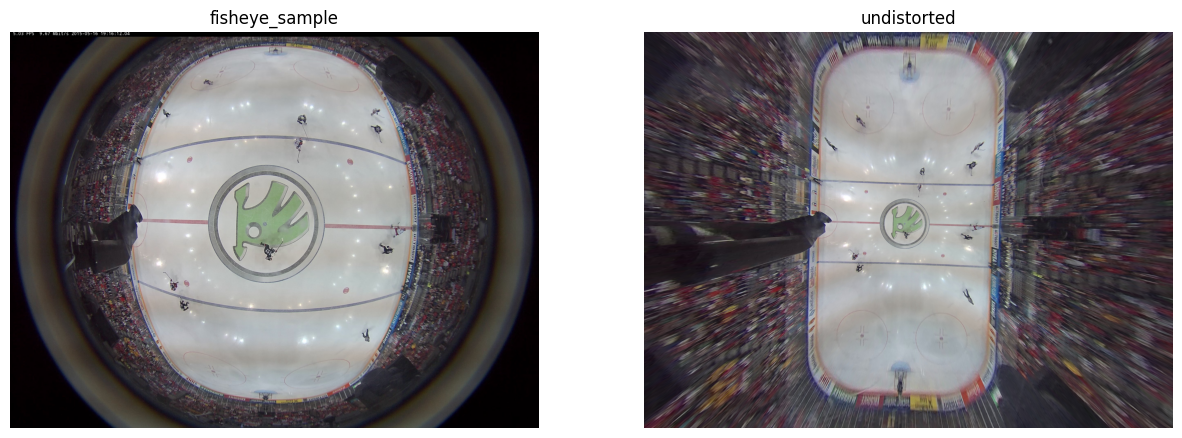

In [15]:
import cv2
import numpy as np

K = np.array([[  689.21,     0.  ,  1295.56],
              [    0.  ,   690.48,   942.17],
              [    0.  ,     0.  ,     1.  ]])
D = np.array([0., 0., 0., 0.]) # zero distortion coefficients work well for this image
Knew = K.copy()    # use Knew to scale the output
Knew[(0,1), (0,1)] = 0.4 * Knew[(0,1), (0,1)] 

img = cv2.imread('./images/practice_img/fisheye_sample.jpg') 
img_undistorted = cv2.fisheye.undistortImage(img, K, D=D, Knew=Knew)
# cv2.imwrite('fisheye_sample_undistorted.jpg', img_undistorted)
cv2.imshow('undistorted', img_undistorted)
cv2.waitKey()
cv2.destroyAllWindows()

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('fisheye_sample'),plt.axis('off')
plt.subplot(122),plt.imshow(cv2.cvtColor(img_undistorted, cv2.COLOR_BGR2RGB)),plt.title('undistorted'),plt.axis('off')
plt.show()

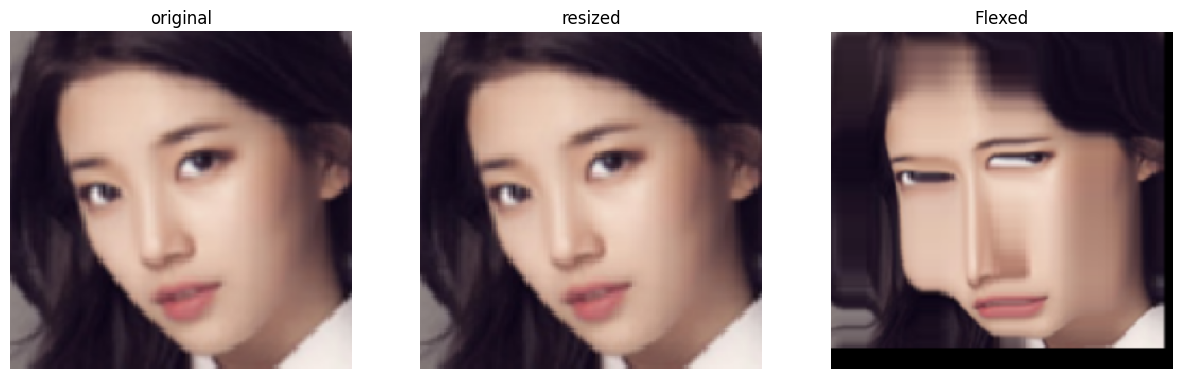

In [25]:
import numpy as np           
import cv2
import math

image = cv2.imread("./images/practice_img/suji_temp.png")
r = 400.0 / image.shape[1]          # resize down to width of 400
dim = (400, int(image.shape[0] * r))
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA) # Perform the resizing of the image

(h, w, c) = resized.shape
center = (w // 2, h // 2)  # calculate the center of the image
flex_x = np.zeros((h,w),np.float32)   # set up the x and y maps as float32
flex_y = np.zeros((h,w),np.float32)

# The cosine function in the offset creates both positive and negative shifts, creating waves in the final image.
for y in range(h):
    for x in range(w):
        flex_x[y,x] = x + math.cos(x/15) * 15
        flex_y[y,x] = y + math.cos(y/30) * 25

dst = cv2.remap(resized,flex_x,flex_y,cv2.INTER_LINEAR)

cv2.imshow("Resized",resized)
cv2.imshow("Flexed",dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

plt.subplot(131),plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)),plt.title('original'),plt.axis('off')
plt.subplot(132),plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)),plt.title('resized'),plt.axis('off')
plt.subplot(133),plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)),plt.title('Flexed'),plt.axis('off')
plt.show()

End